### R script to plot all components of Figure 1 in Rackow et al. 2021, NatComms (run with R 4.0.3 kernel)

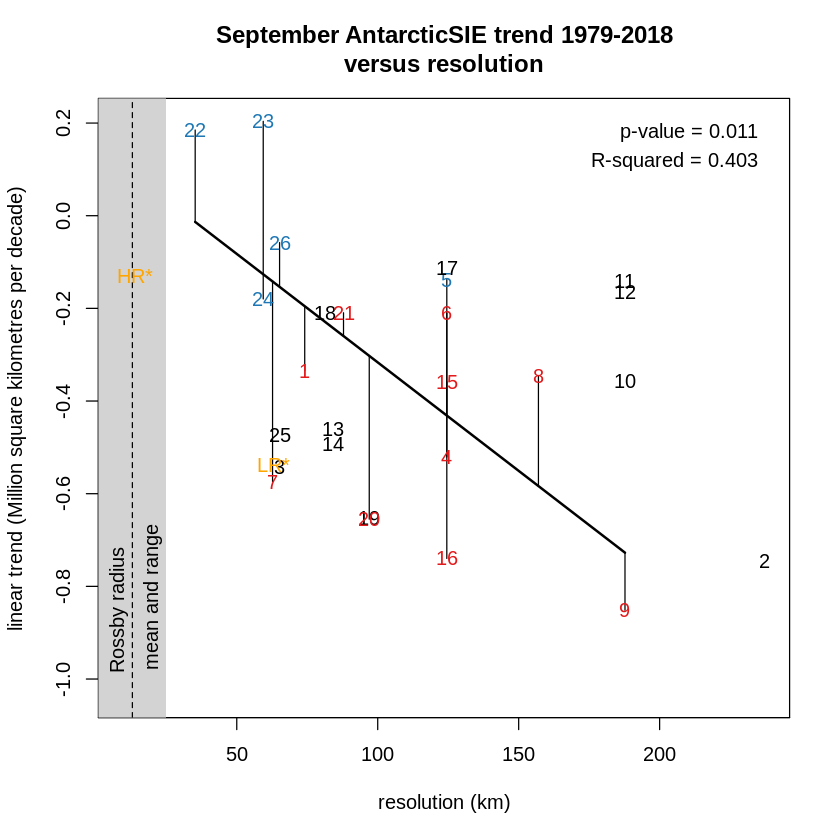

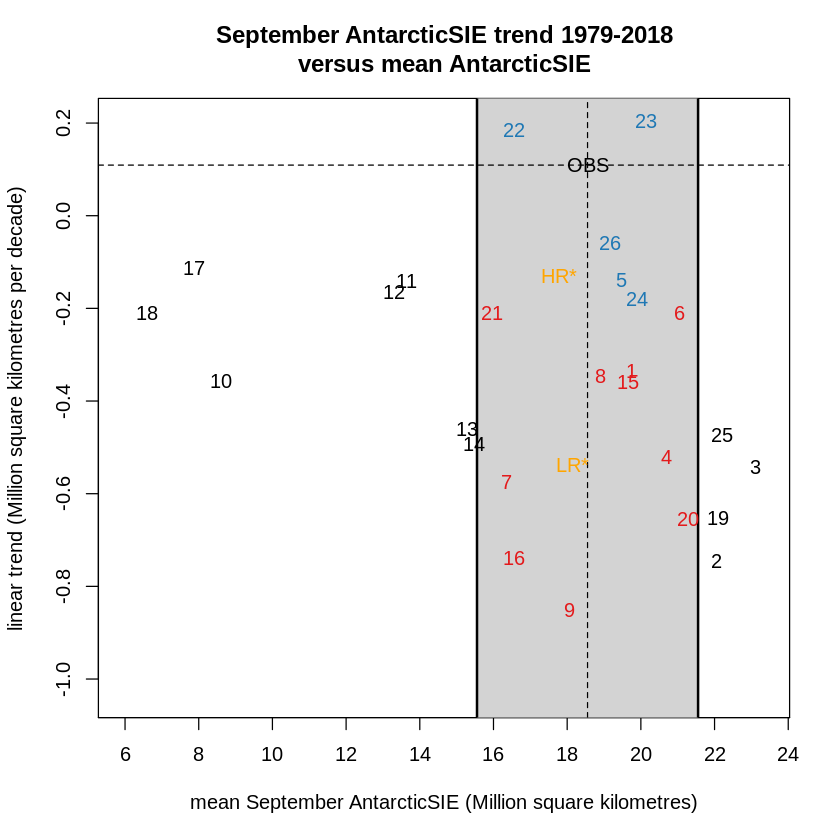

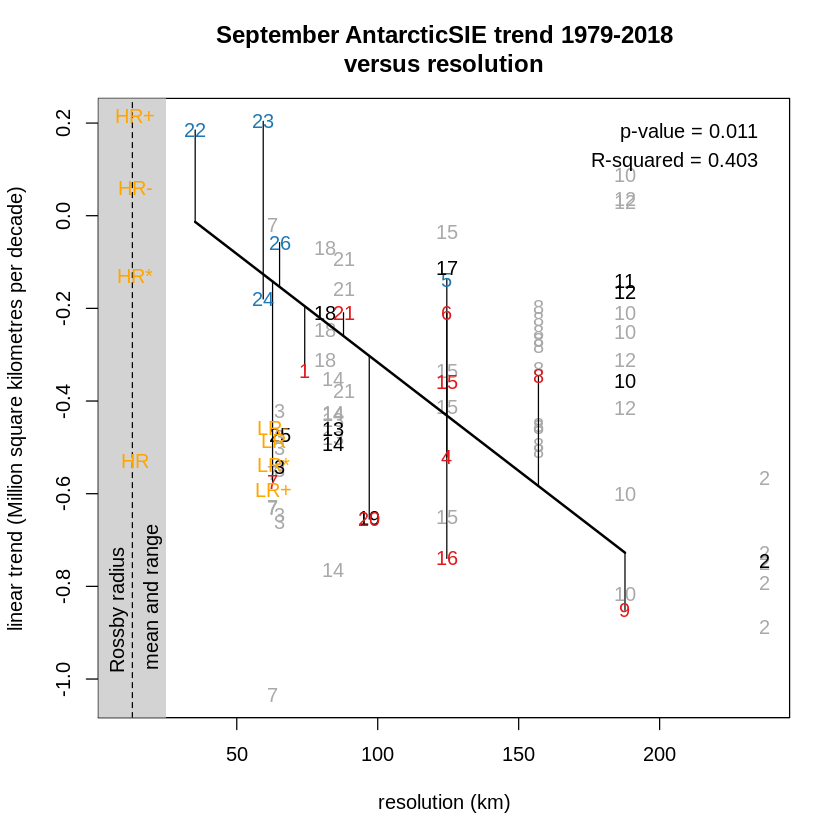

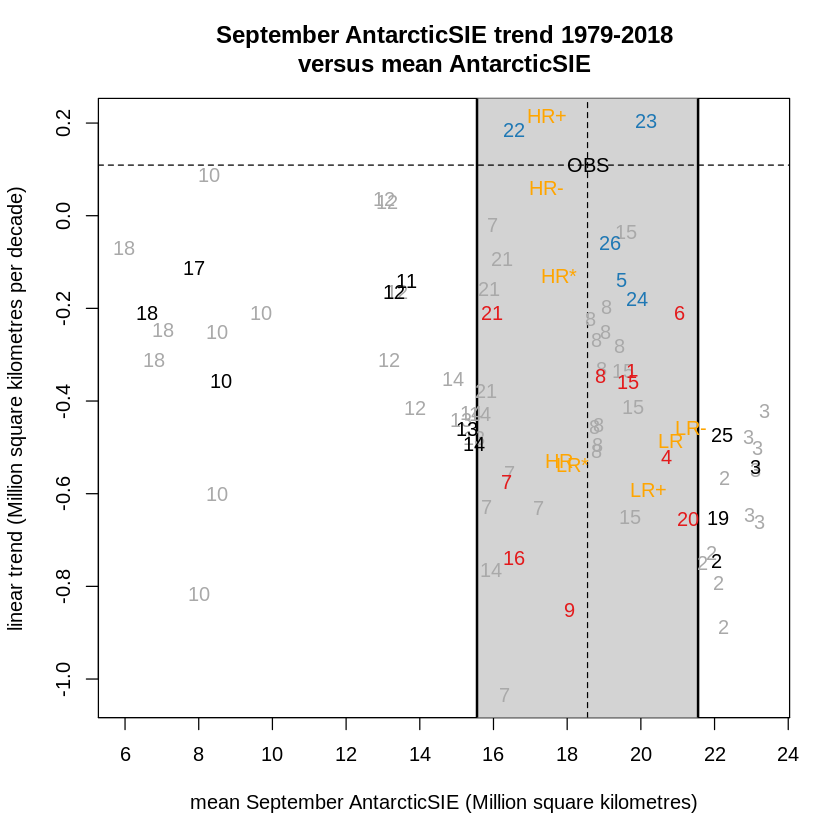

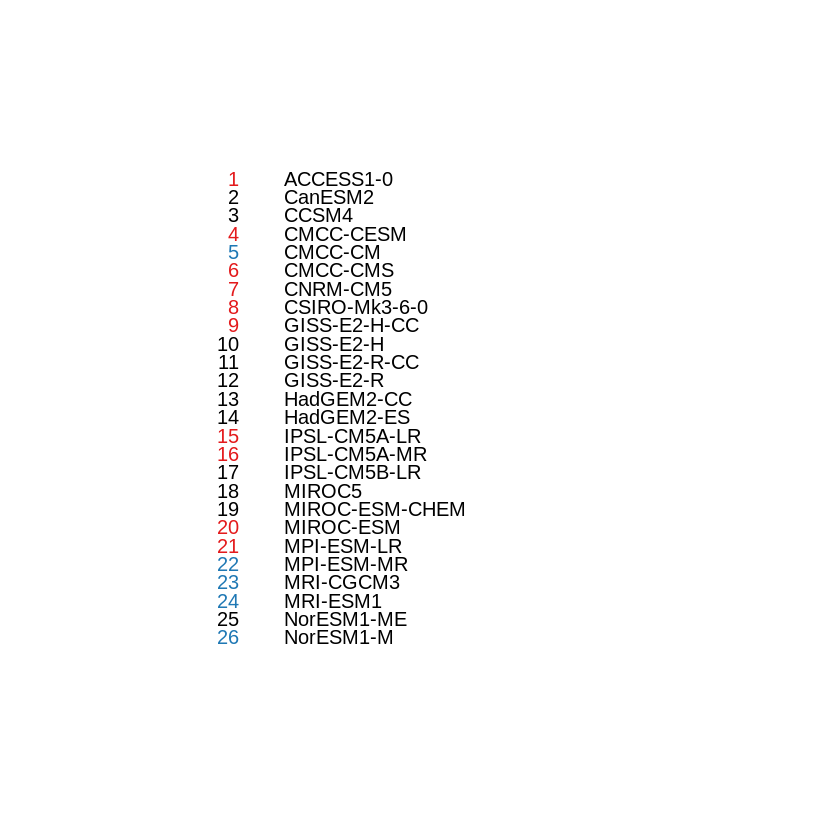

In [1]:
rm(list=ls())

month_str = "September"
var = "AntarcticSIE"
plotpth = "../data/"

f1.tab = read.csv(paste0(plotpth,"Figure1.csv"))
Nm = 26 # number of models
models = f1.tab$model[1:Nm]
reso = f1.tab$resolution[1:Nm]
mean.states = f1.tab$mean_state_ensemble_mean[1:Nm]
mean.states.array = f1.tab[1:Nm,4:13]
lin.trends = f1.tab$linear_trend_ensemble_mean[1:Nm]
lin.trends.array = f1.tab[1:Nm,15:24]
AWICM_LR_means = f1.tab$mean_state_ensemble_mean[27:30]
AWICM_HR_means = f1.tab$mean_state_ensemble_mean[31:34]
AWICM_LR_trends = f1.tab$linear_trend_ensemble_mean[27:30]
AWICM_HR_trends = f1.tab$linear_trend_ensemble_mean[31:34]
AWICM_LR_res = f1.tab$resolution[27]
AWICM_HR_res = f1.tab$resolution[31]
obs.mean = f1.tab$mean_state_ensemble_mean[35]
obs.trend = f1.tab$linear_trend_ensemble_mean[35]

y1 = 1979
y2 = 2018
box.bound.mean = 3
box.bound.trend = 10
ylim=c(0,27)
unitstr = "Million square kilometres"

in.box = (lin.trends > (obs.trend - box.bound.trend) &
            lin.trends < (obs.trend + box.bound.trend) &
            mean.states > (obs.mean - box.bound.mean) &
            mean.states < (obs.mean + box.bound.mean))
N.in.box = sum(in.box)

linmod = lm(lin.trends[in.box] ~ reso[in.box])
reso.min = min(reso[in.box])
reso.max = max(reso[in.box])
reso.min.trend.pred = linmod$coefficients[2] * reso.min + linmod$coefficients[1]
reso.max.trend.pred = linmod$coefficients[2] * reso.max + linmod$coefficients[1]
reso.trend.preds = linmod$coefficients[2] * reso[in.box] + linmod$coefficients[1]

colx = rep("#000000",Nm)
colx[in.box] = "#e31a1c"
colx[in.box & lin.trends >= -0.2] = "#1f78b4"

for (paper_part in c("main","supp")) {
  
  ######################## scatter plot of trend against resolution
  #pdf(file=paste0(plotpth,"Figure1_right_",paper_part,".pdf"),width=6,height=6)
  main = paste0(month_str," ",var," trend ",y1,"-",y2,"\nversus resolution")
  xlimx = range(reso)
  ylimx = range(lin.trends)
  plot(NA,xlab="resolution (km)",ylab=paste0("linear trend (",unitstr," per decade)"),
       xlim=c(10,max(reso)),ylim=range(lin.trends.array,na.rm=TRUE),main=main,xaxt="n")
  axis(side = 1, at=seq(0,250,50))
  
  rect(xleft=0.15480682603511908,ybottom=-2,xright=24.999414578261153,ytop=1,col = "lightgrey",border = NA)
  abline(v = 12.969213443200251,lty=2)
  text(x = 8,y=-0.85,"Rossby radius", srt=90)
  text(x = 20,y=-0.822,"mean and range", srt=90)
  if (paper_part != "main") {
    for (mi in 1:Nm) {
      if (sum(!is.na(lin.trends.array[mi,])) > 1) {
        for (mie in 1:sum(!is.na(lin.trends.array[mi,]))) {
          text(labels=mi, x=reso[mi], y=lin.trends.array[mi,mie], col="darkgrey")
        }
      }
    }
  }
  lines(x = c(reso.min,reso.max), y = c(reso.min.trend.pred, reso.max.trend.pred),lwd=2)
  for (i in 1:N.in.box) {
    lines(x = rep(reso[in.box][i],2), y = c(reso.trend.preds[i], lin.trends[in.box][i]),lwd=1)
  }
  text(labels=1:Nm, x=reso, y=lin.trends, col=colx)
  if (paper_part == "main") {
    text(labels=c("LR*","HR*"),x=c(AWICM_LR_res,AWICM_HR_res),y=c(AWICM_LR_trends[4],AWICM_HR_trends[4]), col="orange")
  } else {
    text(labels=c(paste0(rep("LR",4),c("-","","+","*")),paste0(rep("HR",4),c("-","","+","*"))),
         x=c(rep(AWICM_LR_res,4),rep(AWICM_HR_res,4)),y=c(AWICM_LR_trends,AWICM_HR_trends), col="orange")
  }
  text(x=xlimx[1]+0.99*diff(xlimx),y=ylimx[1]+c(0.98,0.92)*diff(ylimx),labels=c(paste0("p-value = ",signif(summary(linmod)$coefficients[2,4][],2)),
                                                                                paste0("R-squared = ",signif(summary(linmod)$r.squared,3))),adj = c(1,0.5))
  #dev.off()
  
  ######################## scatter plot of trend against mean state
  #pdf(file=paste0(plotpth,"Figure1_left_",paper_part,".pdf"),width=6,height=6)
  main = paste0(month_str," ",var," trend ",y1,"-",y2,"\nversus mean ",var)
  plot(NA,xlab=paste0("mean ",month_str," ",var," (",unitstr,")"),ylab=paste0("linear trend (",unitstr," per decade)"),
       main=main,xaxt="n",xlim=range(mean.states.array,na.rm=TRUE),ylim=range(lin.trends.array,na.rm=TRUE))
  axis(side = 1, at=seq(0,30,2))
  rect(xleft=obs.mean - box.bound.mean, ybottom = obs.trend - box.bound.trend, xright = obs.mean + box.bound.mean, ytop = obs.trend + box.bound.trend, col="lightgrey", lwd=2)
  abline(h=obs.trend,lty=2)
  abline(v=obs.mean,lty=2)
  if (paper_part != "main") {
    for (mi in 1:Nm) {
      if (sum(!is.na(lin.trends.array[mi,])) > 1) {
        for (mie in 1:sum(!is.na(lin.trends.array[mi,]))) {
          text(labels=mi, x=mean.states.array[mi,mie], y=lin.trends.array[mi,mie], col="darkgrey")
        }
      }
    }
  }
  text(labels = "OBS", x=obs.mean, y=obs.trend)
  text(labels=1:Nm, x=mean.states, y=lin.trends, col=colx)
  if (paper_part == "main") {
    text(labels=c("LR*","HR*"),x=c(AWICM_LR_means[4],AWICM_HR_means[4]),y=c(AWICM_LR_trends[4],AWICM_HR_trends[4]), col="orange")
  } else {
    text(labels=c(paste0(rep("LR",4),c("-","","+","*")),paste0(rep("HR",4),c("-","","+","*"))),
         x=c(AWICM_LR_means,AWICM_HR_means),y=c(AWICM_LR_trends,AWICM_HR_trends), col="orange")
  }
  #dev.off()
  
}

#pdf(file=paste0(plotpth,"Figure1_legend.pdf"),width=5,height=10)
plot(NA,xlim=c(0,1),ylim=c(0,1),xlab="",ylab="",xaxt="n",yaxt="n",bty="n")
text(x=0.18, y=seq(.9,.1,-0.8/(Nm-1)), labels=1:Nm, col=colx, adj=c(1,0.5))
text(x=0.25, y=seq(.9,.1,-0.8/(Nm-1)), labels=models, adj=c(0,0.5))
#dev.off()